# CS549 Machine Learning
# Assignment 9: Convolutional Neural Network  for image classification - Irfan Khan


**Total points: 10**

In this assignment, you will implement a fully functioning ConvNet model using PyTorch. You will use the model to conduct image classification on the MNIST dataset (handwritten digits). https://en.wikipedia.org/wiki/MNIST_database

<img src='A9image0.png'>

In [1]:
#Import required packages
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random

# For repeatability among all students and runs, set random seed to 42.

In [2]:

# Set the seed for PyTorch.
torch_seed = 42
torch.manual_seed(torch_seed)


## Load Data

In [3]:
#Load Data. Split into Training Data and Test data and create dataloaders for each.
#Normalization values (0.1307, 0.3081) are often used, for the MNIST dataset

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_size = len(train_data)
print ('train_size', train_size)

test_size = len(test_data)

print ('test_size', test_size)



train_loader = DataLoader(train_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data,batch_size=1, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 37.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.18MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.53MB/s]

train_size 60000
test_size 10000


## Expected Output

train_size 60000<br>
test_size 10000

## Visualize Data

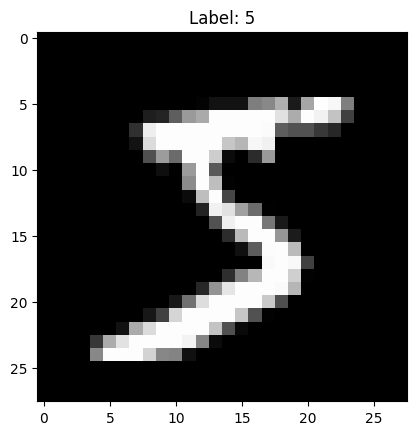

In [4]:
for images, labels in train_loader:
    # Visualize the first image in the batch
    plt.imshow(images[0].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[0]}")
    plt.show()
    break  # Break after visualizing the first image in the batch

## Expected Output

<img src='A9image1.png'>

## Define ConvNet Class

In [5]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # Input channels (1 for grayscale), output channels (6 filters), kernel size 5
        self.pool = nn.MaxPool2d(2, 2)#Kernel size 2, stride 2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # Adjust based on input size after conv2.
        #Pooling layer is also applied after the 2nd Conv Layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Output: 10 class probabilities (0-9)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))#Pooling layer is also applied after the 2nd Conv Layer
        x = x.view(-1, 16 * 4 * 4)  # Flatten for FC layers, The -1 in the first dimension means it will preserve the batch size
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x) #Logits will get returned

        return x

# Create an instance of the class

Define the loss criterion - cross entropy loss and use Adam optimizer

In [6]:
model = MNISTClassifier()  # Create an instance of the defined model class
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Task 1

**4 points **

Train the ConvNet over 10 epochs and print the loss once per epoch for the 938th batch
. There are 60000 training data samples with 64 in each batch, so there will be $\left \lceil 60000/64\right \rceil =$938 batches

In [7]:
num_epochs = 10

for epoch in range(num_epochs):
    # Train loop
    running_loss = 0.0
    #Start your code

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


    #End your code
        # Print statistics
        running_loss += loss.item()


        if (i==937):
            print('[%d] loss: %.3f' %
                  (epoch + 1, running_loss/938))
            running_loss = 0.0



[1] loss: 0.243
[2] loss: 0.075
[3] loss: 0.052
[4] loss: 0.040
[5] loss: 0.033
[6] loss: 0.027
[7] loss: 0.024
[8] loss: 0.021
[9] loss: 0.019
[10] loss: 0.016


## Expected Output

[1] loss: 0.243<br>
[2] loss: 0.075<br>
[3] loss: 0.052<br>
[4] loss: 0.041<br>
[5] loss: 0.032<br>
[6] loss: 0.027<br>
[7] loss: 0.023<br>
[8] loss: 0.022<br>
[9] loss: 0.018<br>
[10] loss: 0.016

## Task 2: Calculate Loss for the Test data on the Trained Conv Net & Collect Outputs (final_output) for Use in Next Cell

**3 Points ****

Calculate Avg Loss for 10000 samples of test data

In [8]:
running_loss = 0.0
concatenated_outputs = []


for i, data in enumerate(test_loader, 0):
    #Begin your code


    inputs, labels = data
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    running_loss += loss.item()
    concatenated_outputs.append(outputs)

    #End your code

print('[%d] loss: %.3f' % (i + 1, running_loss / 10000))
final_output = torch.cat(concatenated_outputs, dim=0)
print ('final_output shape', final_output.shape)



[10000] loss: 0.044
final_output shape torch.Size([10000, 10])


# Expected Output

[10000] loss: 0.045<br>
final_output shape torch.Size([10000, 10])

## Task 3 - Test the Trained Conv Net

Test the Trained Conv Net on three random samples in the test data to see if the prediction is correct!

**3 points***

random_indices [4185, 5874, 8684]
Image at index 4185 - Predicted Label: 1


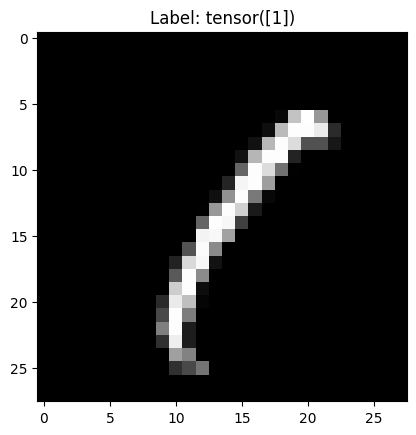

Image at index 5874 - Predicted Label: 5


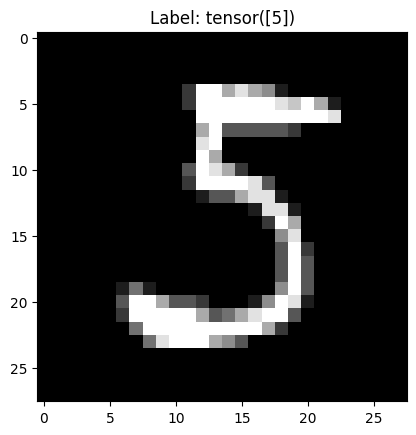

Image at index 8684 - Predicted Label: 3


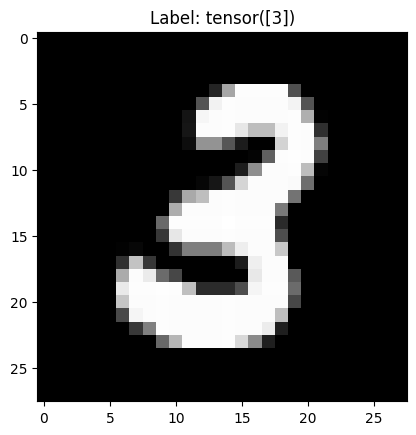

In [9]:
random_seed = 5 #Don't change the random seed
random.seed(random_seed)
# Randomly choose three images
random_indices = random.sample(range(len(test_loader)), 3)
print ('random_indices',random_indices)

for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    for j in random_indices:
        if (i==j):

            #Begin your code.
            #Obtain prediction_prob (predicted class probabilities) for the image

            prediction_prob = model(inputs)
            image_data = inputs
            label = labels
            #End your code


            prediction = torch.argmax(prediction_prob)
            print(f"Image at index {i} - Predicted Label: {prediction}")
            plt.imshow(image_data.squeeze(), cmap='gray')
            plt.title(f"Label: {label}")
            plt.show()

## Expected Output

<img src='A9image2.png'>
<img src='A9image3.png'>
<img src='A9image4.png'>
<img src='A9image5.png'>